In [6]:
import serial
import matplotlib.pyplot as plt
import time
import pandas as pd
from lib import *
import numpy as np
from numpy import sqrt, log, cos, tan, degrees
from scipy.signal import step, lti, TransferFunction
from cmath import polar

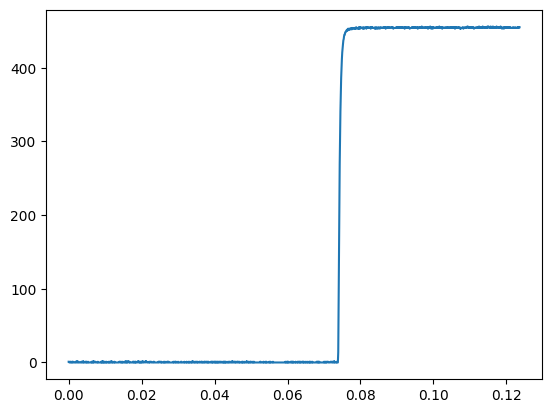

In [7]:
df = pd.read_csv('data/data.csv')
T = 0.0001
samples = int(1/T/100)
df['segundos'] = df.index*T
tempo = df['segundos'].values
valores = df['Channel 1'].values
fig, ax = plt.subplots()
ax.plot(tempo, valores)

In [8]:
max_value = max(df['Channel 1'])
df['diff'] = abs(df['Channel 1'] - max_value*0.63)
i = df.loc[df['Channel 1'] == 0.0].index[-1]
time1 = float(df.loc[df['diff'] == min(df['diff']), 'segundos'])
time0 = df.loc[i,'segundos']
time_last = time1 + T*samples
tau = float(time1 - time0)
K = 455/127
time0,time1,time_last, tau

(0.0738, 0.0743, 0.0843, 0.0005000000000000004)

In [9]:
num = [max_value]
den = [tau, 1]
t_total = time_last - time0

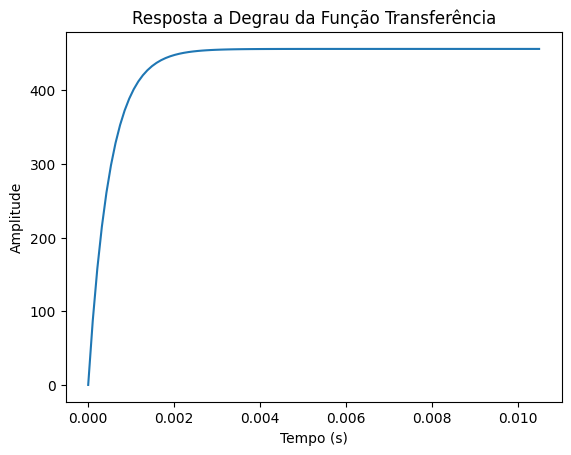

In [10]:
t = np.linspace(0,t_total,samples)
y = transfer_function(num, den, t)
plt.plot(t, y)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Resposta a Degrau da Função Transferência')
plt.show()

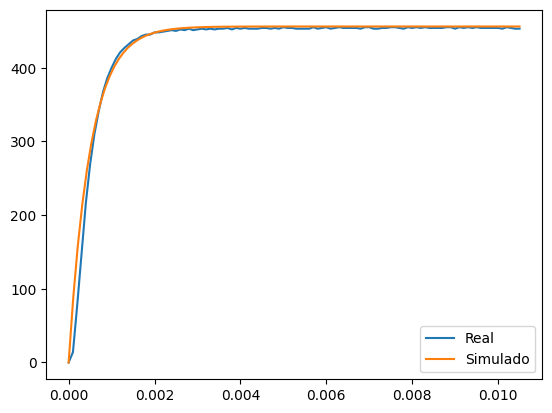

In [11]:
x1 = df.loc[((df['segundos']>= time0) & (df['segundos']<= time_last)), 'segundos'] - time0
y1 = df.loc[((df['segundos']>= time0) & (df['segundos']<= time_last)), 'Channel 1']

x2 = t
y2 = y
# Cria uma figura\n",
fig, ax = plt.subplots()
# Adiciona o primeiro gráfico à figura\n",
ax.plot(x1, y1, label='Real')
# Adiciona o segundo gráfico à figura\n",
ax.plot(x2, y2, label='Simulado')

# Adiciona legenda\n",
ax.legend()
# Mostra a figura\n",
plt.show()

In [12]:
Tp = 2*tau
mp = 0.1
Kamort = sqrt((log(mp)**2)/(np.pi**2+(log(mp)**2)))
omega_d = np.pi/Tp
omega_n = omega_d/sqrt(1-Kamort**2)
p1 = complex (Kamort*omega_n, omega_d)
p2 = complex (Kamort*omega_n, -omega_d)
Hs0 = K/(tau*p1+1)

In [13]:
rHs0, tetaHs0 = polar(Hs0)
rp , tetap = polar(p1)
tetacs0 = np.pi + tetaHs0
rcs0 = 1/rHs0
np.degrees(tetaHs0), np.degrees(tetap), np.degrees(tetacs0)

(-36.13557278762115, 53.760984188412465, 143.86442721237884)

In [14]:
A = (1/p1).real
B = (1/p1).imag
Ti = 1/(B/tan(tetacs0)-A)
k = rcs0/(abs(1+Ti/p1))
ki = k/Ti
k, ki, Ti

(0.279120879120879, 3.679541678987417e-05, 7585.751255783874)

In [15]:
(abs(1+Ti/p1))

2.663730602160434

In [16]:
kp = (2*omega_n*Kamort*tau-1)/K
ki = (omega_n**2)*tau/K
kp,ki

(0.36357869628624995, 2117.341559306706)

In [17]:
455*1.1,(562-455)/455

(500.50000000000006, 0.23516483516483516)

In [18]:
Tu = 4* 0.0001
ku = 2
kp = ku*0.6
Ti = 0.5*Tu
ki = kp/Ti
Td = 0.125*Tu
kd = kp*Tu
kp, ki, kd 


(1.2, 5999.999999999999, 0.00048)

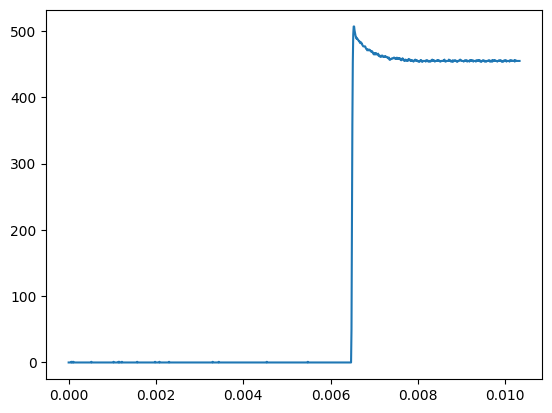

In [21]:
df1 = pd.read_csv('data/resultado.csv')
T = 0.00001
samples = int(1/T/100)
df1['segundos'] = df1.index*T
tempo = df1['segundos'].values
valores = df1['Channel 1'].values
fig, ax = plt.subplots()
ax.plot(tempo, valores)

In [42]:
max_value = max(df1['Channel 1'])
Tp1 = df1.loc[((df1['Channel 1']) == max_value), 'segundos'].values.mean()
i = df1.loc[(df1['Channel 1'] == 0.0), 'segundos'].index[-1]
time01 = df1.loc[i,'segundos']
Tp1 - time01, Tp


(6.499999999999995e-05, 0.0010000000000000009)